<a href="https://colab.research.google.com/github/fernando08ps/mentorship_t_f_datascience/blob/main/Telco_test_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [5]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d blastchar/telco-customer-churn
!unzip telco-customer-churn.zip


mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 172k/172k [00:00<00:00, 483kB/s]
100% 172k/172k [00:00<00:00, 483kB/s]
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [6]:
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [7]:
# Display the first few rows of the DataFrame
print(df.head())

# General information about data types and missing values
print(df.info())

# Basic descriptive statistics
print(df.describe())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [8]:
# Count missing values in each column
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


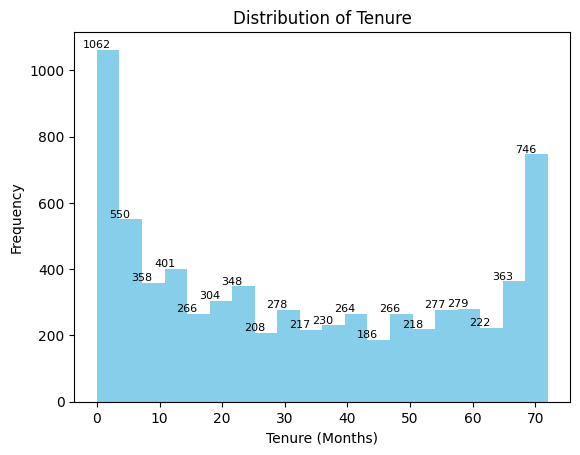

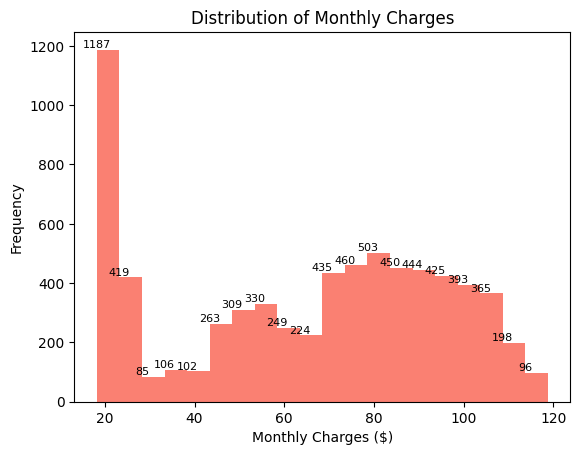

In [18]:
import matplotlib.pyplot as plt

# Plot a histogram for tenure with values inside the bars
plt.hist(df['tenure'], bins=20, color='skyblue')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')

# Add values inside the bars
counts, bins, patches = plt.hist(df['tenure'], bins=20, color='skyblue')
for count, bin, patch in zip(counts, bins, patches):
    plt.text(bin, count, str(int(count)), ha='center', va='bottom', fontsize=8, color='black')

plt.show()

# Plot a histogram for MonthlyCharges with values inside the bars
plt.hist(df['MonthlyCharges'], bins=20, color='salmon')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges')

# Add values inside the bars
counts, bins, patches = plt.hist(df['MonthlyCharges'], bins=20, color='salmon')
for count, bin, patch in zip(counts, bins, patches):
    plt.text(bin, count, str(int(count)), ha='center', va='bottom', fontsize=8, color='black')

plt.show()


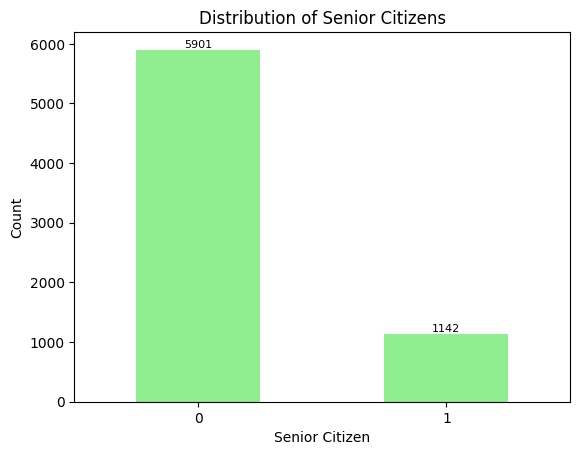

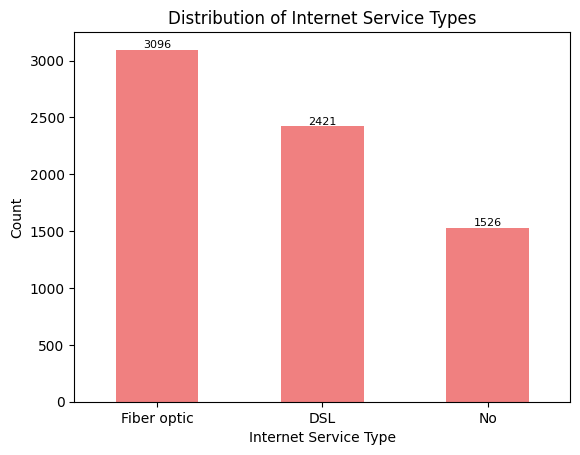

In [19]:
# Plot a bar chart for SeniorCitizen with values above the bars
senior_citizen_counts = df['SeniorCitizen'].value_counts()
senior_citizen_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.title('Distribution of Senior Citizens')

# Add values above the bars
for index, value in enumerate(senior_citizen_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8, color='black')

plt.xticks(rotation=0)
plt.show()

# Plot a bar chart for InternetService with values above the bars
internet_service_counts = df['InternetService'].value_counts()
internet_service_counts.plot(kind='bar', color='lightcoral')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.title('Distribution of Internet Service Types')

# Add values above the bars
for index, value in enumerate(internet_service_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8, color='black')

plt.xticks(rotation=0)
plt.show()


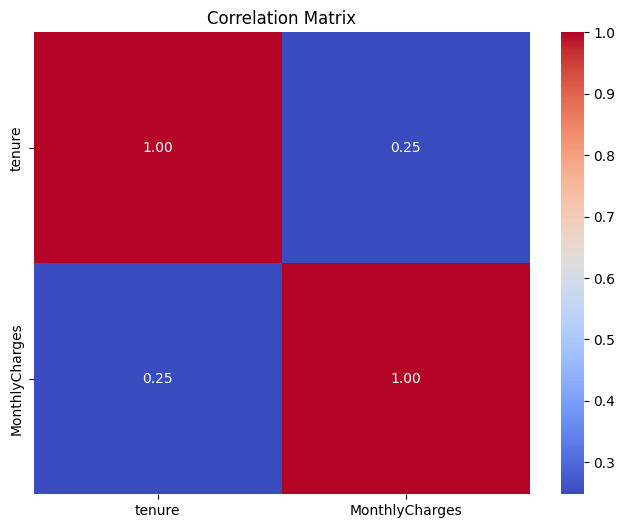

In [20]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df[['tenure', 'MonthlyCharges']].corr()

# Create a heatmap of the correlation matrix with values
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()


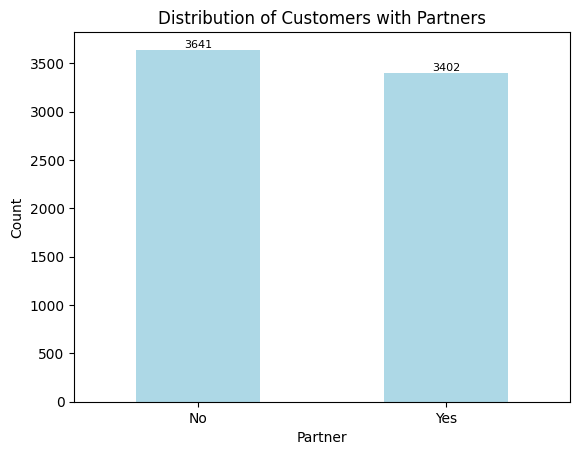

In [22]:
# Plot a bar chart for the "Partner" feature
partner_counts = df['Partner'].value_counts()
partner_counts.plot(kind='bar', color='lightblue')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.title('Distribution of Customers with Partners')

# Add values above the bars
for index, value in enumerate(partner_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8, color='black')

plt.xticks(rotation=0)
plt.show()


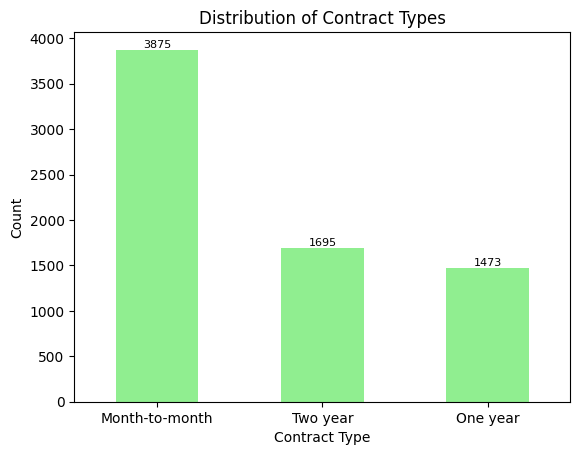

In [23]:
# Plot a bar chart for the "Contract" feature
contract_counts = df['Contract'].value_counts()
contract_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Distribution of Contract Types')

# Add values above the bars
for index, value in enumerate(contract_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8, color='black')

plt.xticks(rotation=0)
plt.show()


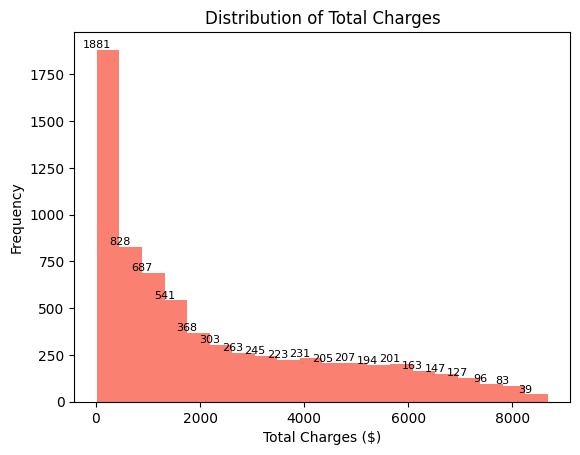

In [24]:
# Convert the "TotalCharges" column to numeric (if not already)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Plot a histogram for Total Charges with values inside the bars
plt.hist(df['TotalCharges'], bins=20, color='salmon')
plt.xlabel('Total Charges ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Charges')

# Add values inside the bars
counts, bins, patches = plt.hist(df['TotalCharges'], bins=20, color='salmon')
for count, bin, patch in zip(counts, bins, patches):
    plt.text(bin, count, str(int(count)), ha='center', va='bottom', fontsize=8, color='black')

plt.show()


In [26]:
# List all the column names in your dataset
column_names = df.columns.tolist()

# Check if the column names related to churn are present
print(column_names)


['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


### CHURN ANALYSIS

In [27]:
from scipy.stats import chi2_contingency

# Create a list of categorical columns to test
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']

# Create an empty dictionary to store the results
chi2_results = {}

# Iterate through each categorical column and perform Chi-Square test
for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df['Churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[column] = {'Chi-Square Statistic': chi2, 'p-value': p}

# Display the results
for column, results in chi2_results.items():
    print(f"Chi-Square Test for {column}:")
    print("Chi-Square Statistic:", results['Chi-Square Statistic'])
    print("p-value:", results['p-value'])
    print()


Chi-Square Test for gender:
Chi-Square Statistic: 0.4840828822091383
p-value: 0.48657873605618596

Chi-Square Test for Partner:
Chi-Square Statistic: 158.7333820309922
p-value: 2.1399113440759935e-36

Chi-Square Test for Dependents:
Chi-Square Statistic: 189.12924940423474
p-value: 4.9249216612154196e-43

Chi-Square Test for PhoneService:
Chi-Square Statistic: 0.9150329892546948
p-value: 0.3387825358066928

Chi-Square Test for MultipleLines:
Chi-Square Statistic: 11.33044148319756
p-value: 0.0034643829548773

Chi-Square Test for InternetService:
Chi-Square Statistic: 732.309589667794
p-value: 9.571788222840544e-160

Chi-Square Test for OnlineSecurity:
Chi-Square Statistic: 849.9989679615965
p-value: 2.661149635176552e-185

Chi-Square Test for OnlineBackup:
Chi-Square Statistic: 601.812790113409
p-value: 2.0797592160864276e-131

Chi-Square Test for DeviceProtection:
Chi-Square Statistic: 558.419369407389
p-value: 5.505219496457244e-122

Chi-Square Test for TechSupport:
Chi-Square Statis

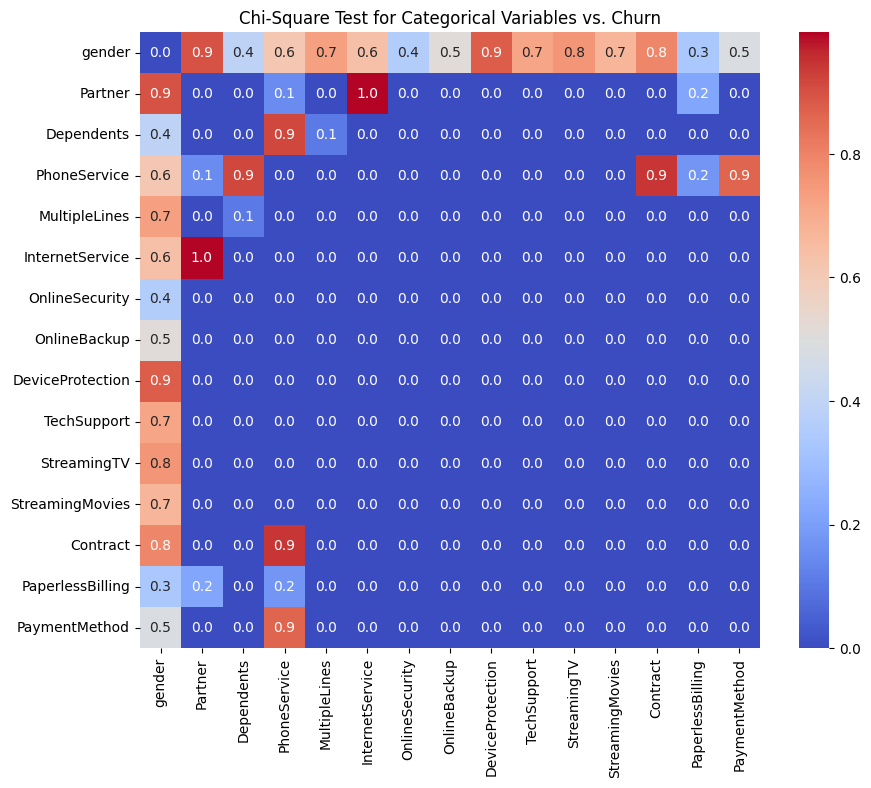

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a list of categorical columns to test
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']

# Create an empty matrix to store p-values
p_value_matrix = np.zeros((len(categorical_columns), len(categorical_columns)), dtype=np.float32)

# Iterate through each pair of categorical columns and perform Chi-Square tests
for i, column1 in enumerate(categorical_columns):
    for j, column2 in enumerate(categorical_columns):
        if i != j:
            contingency_table = pd.crosstab(df[column1], df[column2])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            p_value_matrix[i, j] = p

# Create a heatmap for p-values
plt.figure(figsize=(10, 8))
sns.heatmap(p_value_matrix, cmap='coolwarm', annot=True, fmt=".1f", xticklabels=categorical_columns, yticklabels=categorical_columns)
plt.title('Chi-Square Test for Categorical Variables vs. Churn')
plt.show()


Analyze P-Values:

Variables like gender and PhoneService have high p-values, indicating no significant association with churn.
In contrast, variables such as Partner, Dependents, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, and PaymentMethod all have very low p-values, suggesting a significant association with churn.

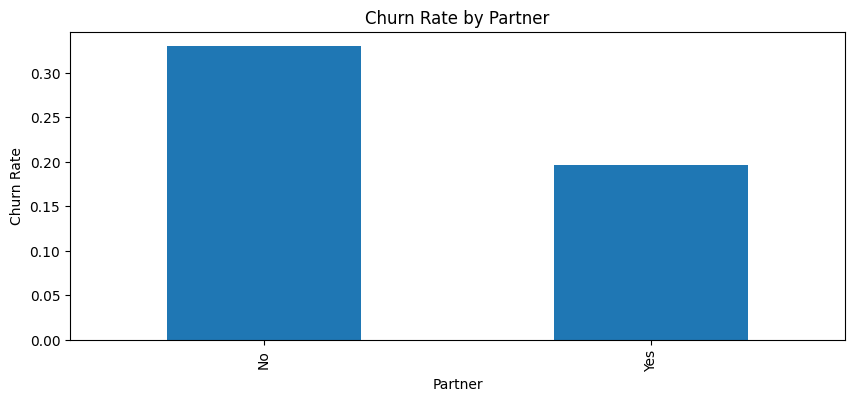

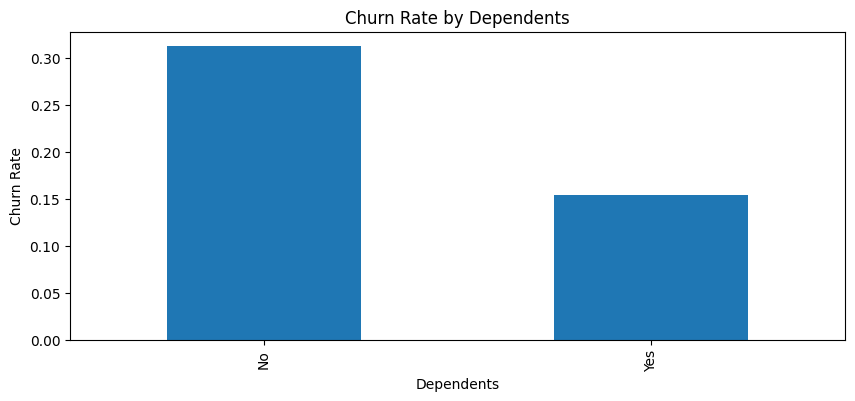

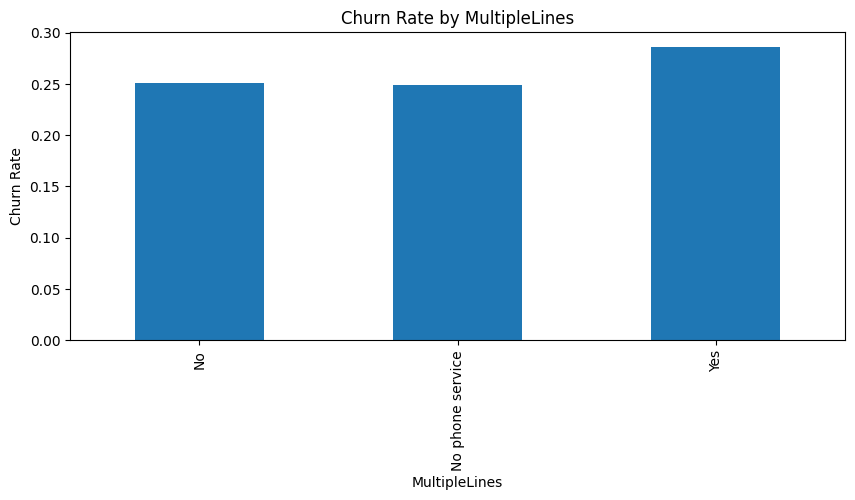

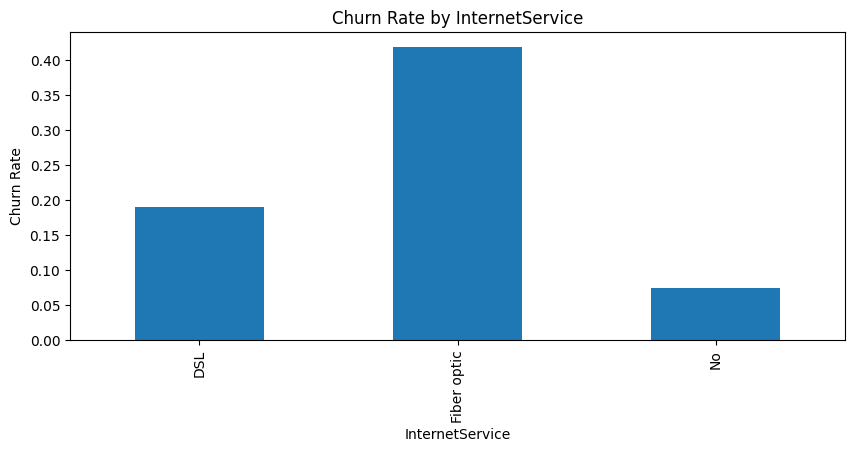

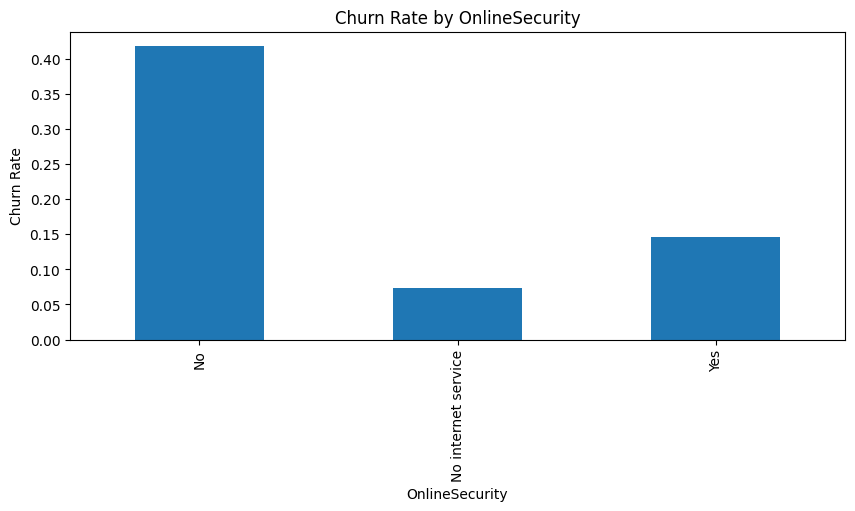

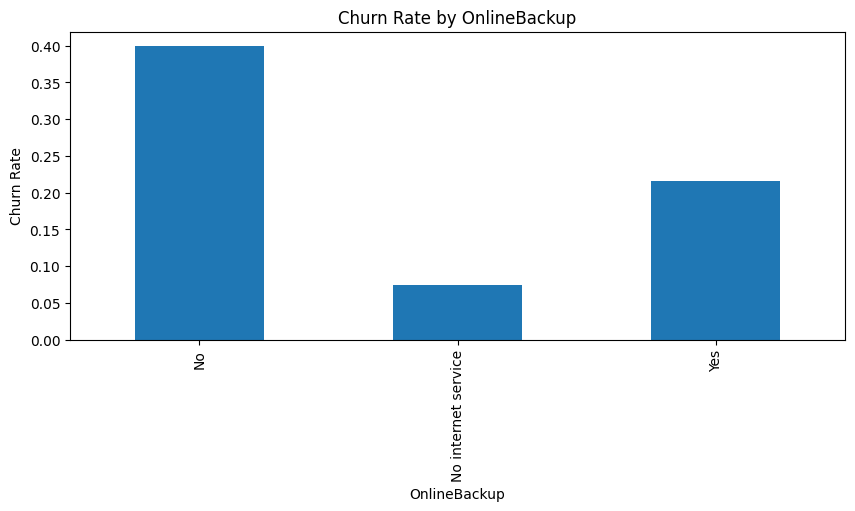

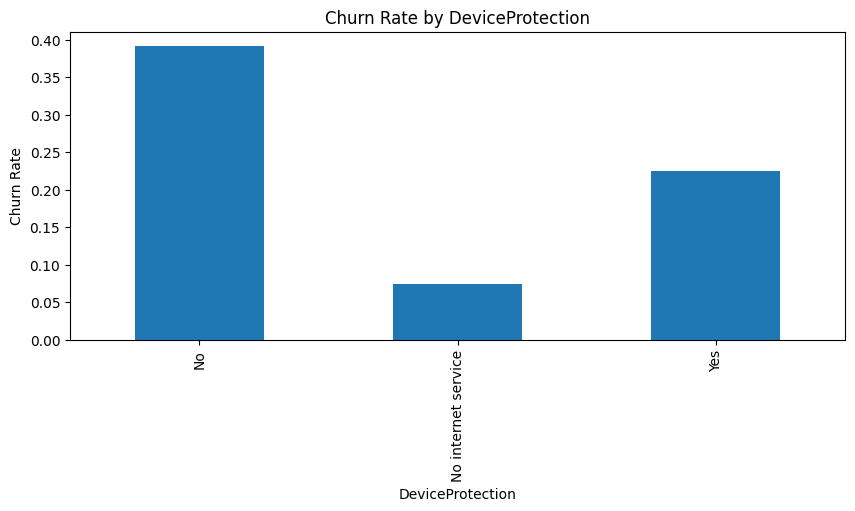

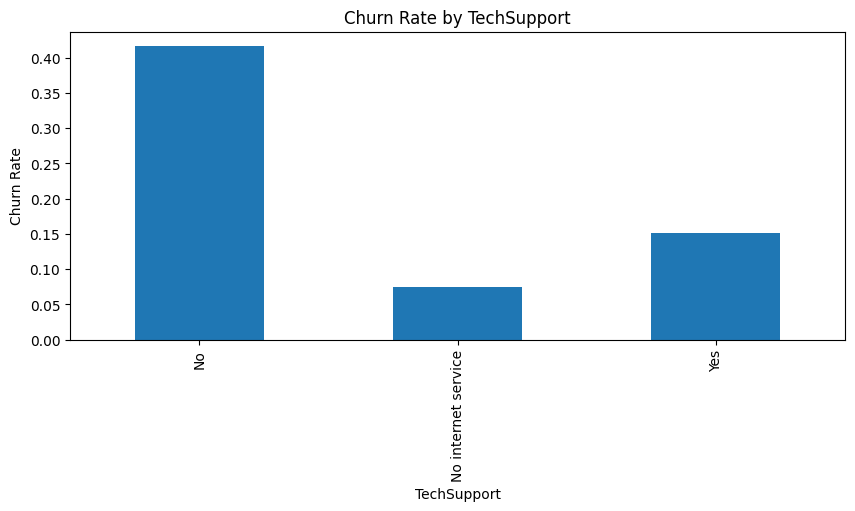

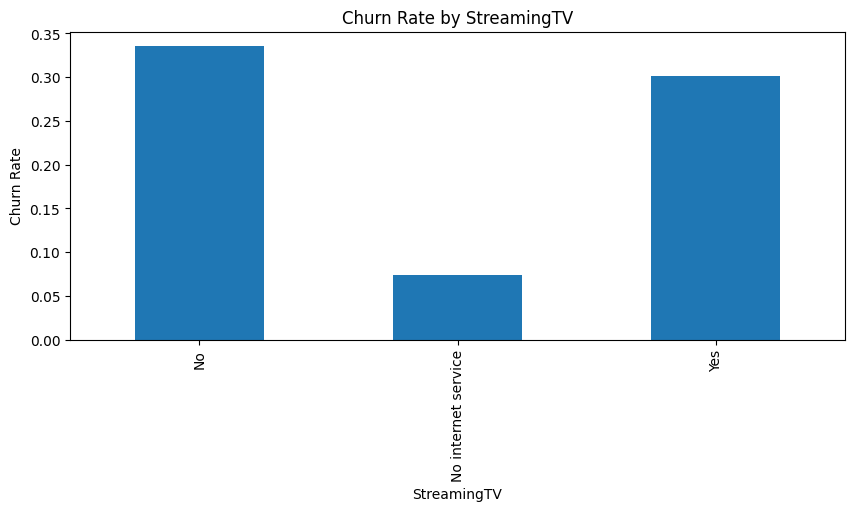

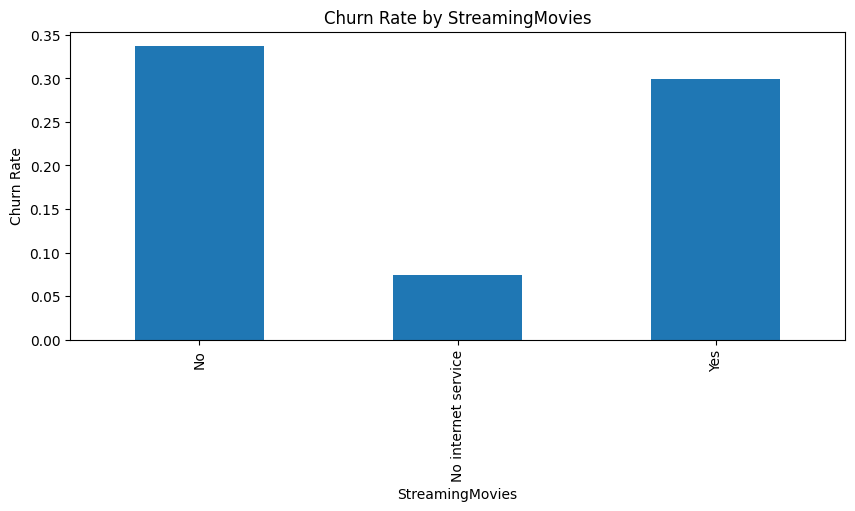

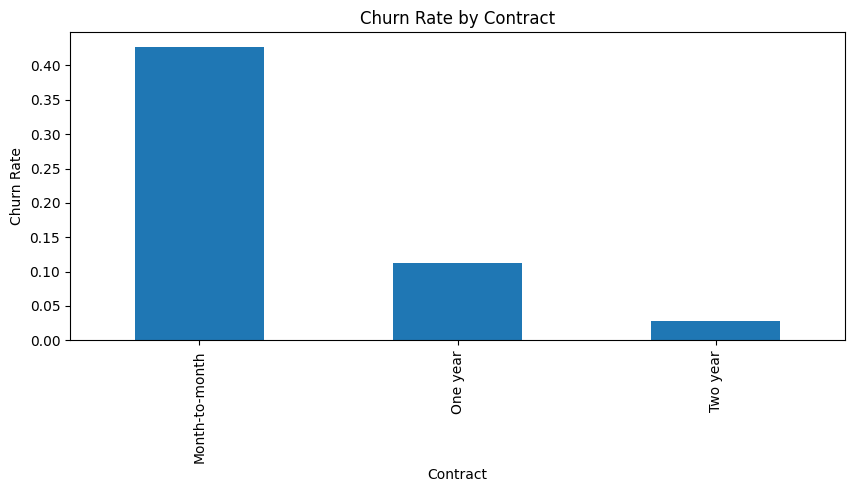

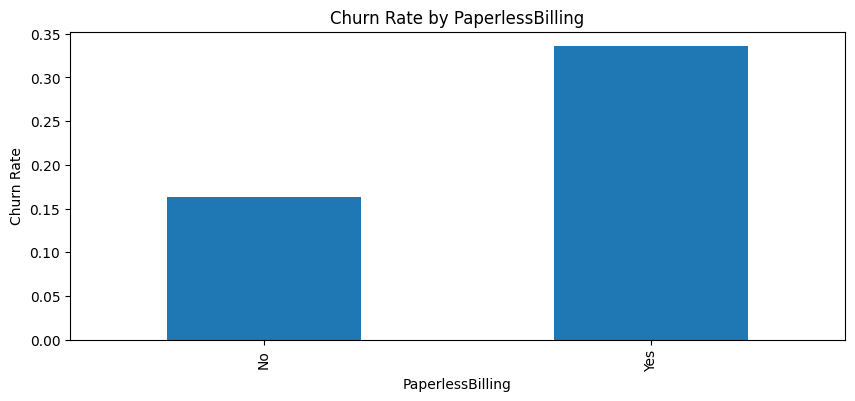

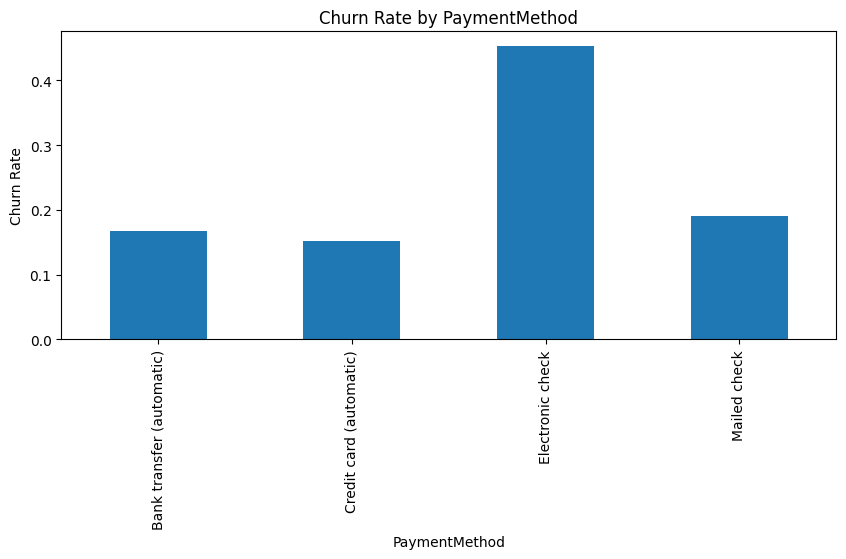

In [36]:
# Define the list of significant categorical columns based on the Chi-Square test results
significant_categorical_columns = [
    'Partner', 'Dependents', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod'
]

# Then you can run your loop to calculate and plot the churn rate for each significant category
# Assuming df['Churn'] contains whether a customer has churned (Yes or No)
for column in significant_categorical_columns:
    # Calculate the churn rate for each category within the variable
    churn_rate_by_category = df.groupby(column)['Churn'].value_counts(normalize=True).unstack()
    churn_rate_by_category = churn_rate_by_category['Yes']  # Assuming 'Yes' indicates churn

    # Plotting the churn rate for each category
    plt.figure(figsize=(10, 4))
    churn_rate_by_category.plot(kind='bar')
    plt.title(f'Churn Rate by {column}')
    plt.ylabel('Churn Rate')
    plt.show()


T-Statistic: 18.407526676414673
p-value: 8.59244933154705e-73


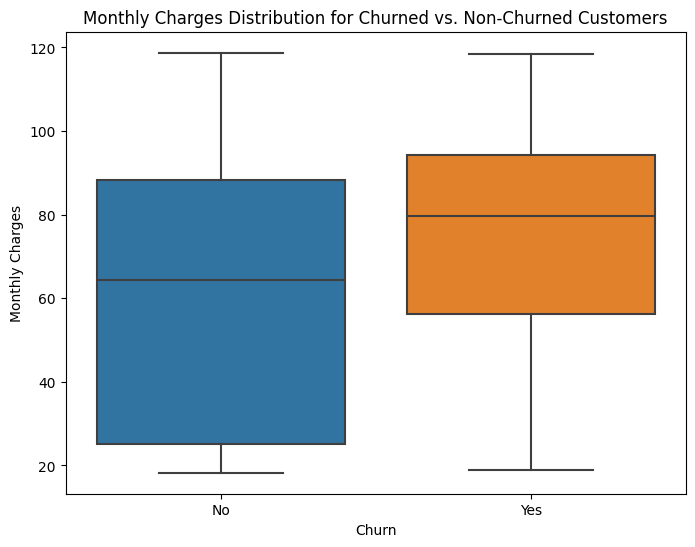

In [32]:
from scipy.stats import ttest_ind

# Separate the data into churned and non-churned groups
churned = df[df['Churn'] == 'Yes']['MonthlyCharges']
not_churned = df[df['Churn'] == 'No']['MonthlyCharges']

# Perform a t-test
t_stat, p_value = ttest_ind(churned, not_churned, equal_var=False)

print("T-Statistic:", t_stat)
print("p-value:", p_value)
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges Distribution for Churned vs. Non-Churned Customers')
plt.show()



F-Statistic: 2960.0151181845877
p-value: 0.0


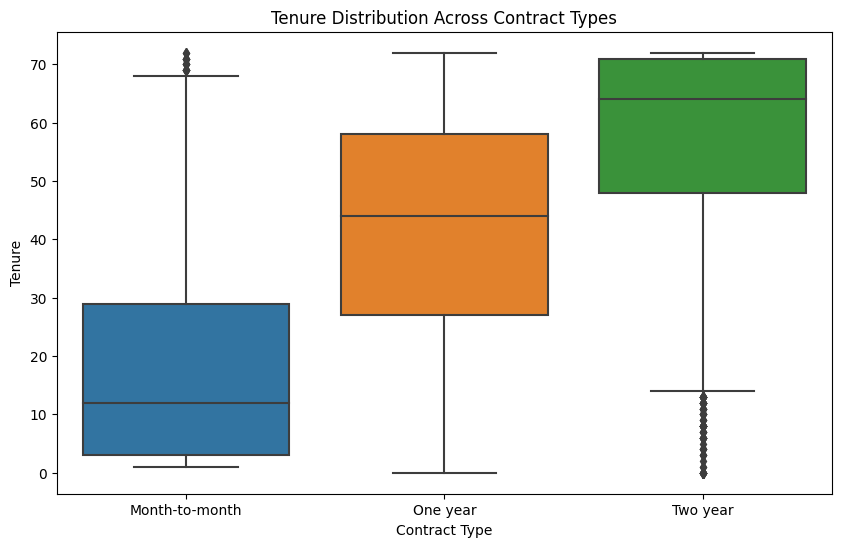

In [33]:
from scipy.stats import f_oneway

# Extract the unique contract types
contract_types = df['Contract'].unique()

# Perform ANOVA test
f_stat, p_value = f_oneway(*[df[df['Contract'] == contract]['tenure'] for contract in contract_types])

print("F-Statistic:", f_stat)
print("p-value:", p_value)
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='tenure', data=df)
plt.xlabel('Contract Type')
plt.ylabel('Tenure')
plt.title('Tenure Distribution Across Contract Types')
plt.show()

